In [1]:
## Import different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE

In [2]:
## Reading the data
data=pd.read_csv('insuranceFraud.csv')

In [3]:
## Read the first five rows of the data.
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
## Shape
data.shape

(1000, 39)

##### The dataset has 1000 rows and 39 columns.

In [5]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
## Checking the missing values
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

##### From the given result we can observe that, the dataset has no missing values. But if we look at the dataset we can see that there are missing values which are replaced by '?'.

##### We are replacing '?' with 'nan' for them.

In [7]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

collision_type 178
property_damage 360
police_report_available 343


In [8]:
## Now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [9]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

months_as_customer 0
age 0
policy_number 0
policy_bind_date 0
policy_state 0
policy_csl 0
policy_deductable 0
policy_annual_premium 0
umbrella_limit 0
insured_zip 0
insured_sex 0
insured_education_level 0
insured_occupation 0
insured_hobbies 0
insured_relationship 0
capital-gains 0
capital-loss 0
incident_date 0
incident_type 0
collision_type 0
incident_severity 0
authorities_contacted 0
incident_state 0
incident_city 0
incident_location 0
incident_hour_of_the_day 0
number_of_vehicles_involved 0
property_damage 0
bodily_injuries 0
witnesses 0
police_report_available 0
total_claim_amount 0
injury_claim 0
property_claim 0
vehicle_claim 0
auto_make 0
auto_model 0
auto_year 0
fraud_reported 0


##### So, we have replaced all such values with 'nan' values.

In [10]:
## Drop the unnecessary columns
data=data.drop(['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year'],axis=1)

In [11]:
## Shape of the data
data.shape

(1000, 27)

In [12]:
data['collision_type'].unique() # Unique values of collision_type

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [13]:
data['property_damage'].unique() # Unique values of property_damage

array(['YES', nan, 'NO'], dtype=object)

In [14]:
data['police_report_available'].unique() # Unique values of police_report_available

array(['YES', nan, 'NO'], dtype=object)

In [15]:
## Impute nan value of collision_type column
data['collision_type_Var']=np.where(data['collision_type'].isnull(),1,0)
frequent=data['collision_type'].mode()[0]
data['collision_type'].fillna(frequent,inplace=True)

In [16]:
## Impute nan values of property_damage columns
data['property_damage_Var']=np.where(data['property_damage'].isnull(),1,0)
frequent=data['property_damage'].mode()[0]
data['property_damage'].fillna(frequent,inplace=True)

In [17]:
## Impute nan values of police_report_available column
data['police_report_available_Var']=np.where(data['police_report_available'].isnull(),1,0)
frequent=data['police_report_available'].mode()[0]
data['police_report_available'].fillna(frequent,inplace=True)

In [18]:
data['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [19]:
## Extracting the categorical columns
cat_df=data.select_dtypes(include=['object']).copy()

In [20]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [21]:
data['policy_csl'].value_counts() ## values of each categories of policy_csl column

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [22]:
## We will perform one hot encoding for nominal categorical variable.
policy_csl = data[["policy_csl"]]
policy_csl = pd.get_dummies(policy_csl, drop_first= True)

In [23]:
policy_csl.head()

,policy_csl_250/500,policy_csl_500/1000
0,1,0
1,1,0
2,0,0
3,1,0
4,0,1


In [24]:
data['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [25]:
## As insured_sex is nominal ordinal data we will perform one hot encoding
insured_sex = data[["insured_sex"]]
insured_sex = pd.get_dummies(insured_sex, drop_first= True)

In [26]:
data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [27]:
## As insured_education_level is nominal ordinal data we will perform one hot encoding
insured_education_level = data[["insured_education_level"]]
insured_education_level = pd.get_dummies(insured_education_level, drop_first= True)

In [28]:
data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [29]:
## As insured_occupation is nominal ordinal data we will perform one hot encoding
insured_occupation = data[["insured_occupation"]]
insured_occupation = pd.get_dummies(insured_occupation, drop_first= True)

In [30]:
data['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [31]:
## As insured_relationship is nominal ordinal data we will perform one hot encoding
insured_relationship = data[["insured_relationship"]]
insured_relationship = pd.get_dummies(insured_relationship, drop_first= True)

In [32]:
data['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [33]:
## As incident_type is nominal ordinal data we will perform one hot encoding
incident_type = data[["incident_type"]]
incident_type = pd.get_dummies(incident_type, drop_first= True)

In [34]:
data['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [35]:
## As collision_type is nominal ordinal data we will perform one hot encoding
collision_type = data[["collision_type"]]
collision_type = pd.get_dummies(collision_type, drop_first= True)

In [36]:
data['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [37]:
## As 'incident_severity' is nominal ordinal data we will perform one hot encoding
incident_severity = data[["incident_severity"]]
incident_severity = pd.get_dummies(incident_severity, drop_first= True)

In [38]:
data['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [39]:
## As 'authorities_contacted' is nominal ordinal data we will perform one hot encoding
authorities_contacted = data[["authorities_contacted"]]
authorities_contacted = pd.get_dummies(authorities_contacted, drop_first= True)

In [40]:
data['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [41]:
## As 'property_damage' is nominal ordinal data we will perform one hot encoding
property_damage = data[["property_damage"]]
property_damage = pd.get_dummies(property_damage, drop_first= True)

In [42]:
data['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [43]:
## As 'police_report_available' is nominal ordinal data we will perform one hot encoding
police_report_available = data[["police_report_available"]]
police_report_available = pd.get_dummies(police_report_available, drop_first = True)

In [44]:
data = data.drop(['collision_type_Var', 'property_damage_Var','police_report_available_Var'], axis = 1)

In [45]:
data.shape

(1000, 27)

In [46]:
data.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [47]:
final_df = pd.concat([data,policy_csl, insured_sex, insured_education_level,
       insured_occupation, insured_relationship, incident_type,
       collision_type, incident_severity, authorities_contacted,
       property_damage, police_report_available], axis = 1)

In [48]:
final_df.shape

(1000, 68)

In [49]:
final_df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported',
       'policy_csl_250/500', 'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exe

In [50]:
final_df.drop(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'], axis = 1, inplace = True)

In [51]:
final_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1,0,0,0,0,0,0,1,1,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,1,0,0,0,0,0,1,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,1,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,0,0,1,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,1,0,0,0,1,0,0,0,0


In [52]:
final_df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'fraud_reported', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured

In [53]:
final_df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [54]:
final_df.replace({'Y' : 1, 'N' : 0}, inplace = True)

In [55]:
final_df['fraud_reported'].unique()

array([1, 0], dtype=int64)

c:\users\laboni\anaconda3\envs\insurancefraud01\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

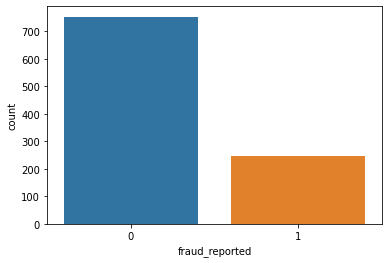

In [56]:
sns.countplot(final_df['fraud_reported'])

##### From the given result we can observe that the dataset is not imbalanced.

In [57]:
## Seperating the feature and target column
X = final_df.drop(['fraud_reported'],axis=1)
y = final_df.fraud_reported

In [58]:
## Extracting the numerical columns
num_df=final_df.select_dtypes(include=['int64']).copy()

<AxesSubplot:>

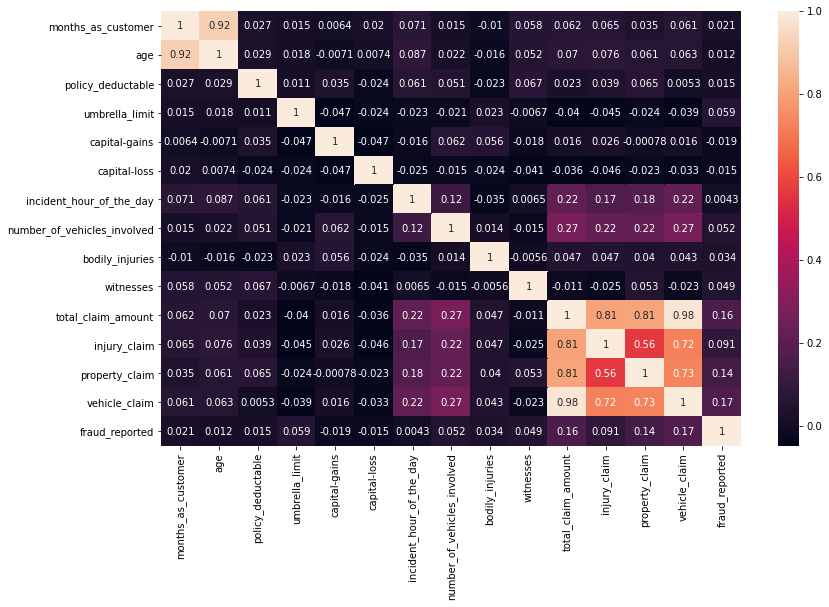

In [59]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(),annot=True)

##### From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column. Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [60]:
X.drop(columns=['age','total_claim_amount'],inplace=True)

In [61]:
## Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=355)

In [62]:
num_df=X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [63]:
print(X_train.shape)
print(num_df.shape)

(800, 54)
(800, 12)


In [64]:
## Scaling the numeric values in the dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
scaled_data = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)

In [66]:
X_train.drop(columns = scaled_num_df.columns, inplace=True)

c:\users\laboni\anaconda3\envs\insurancefraud01\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
X_train=pd.concat([scaled_num_df,X_train],axis=1)

In [68]:
X_train.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_annual_premium', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupatio

In [69]:
X_train.shape

(800, 54)

### Modeling

In [70]:
def svm_classifier(X_train,X_test,y_train,y_test):
    classifier_svm=SVC(kernel='rbf',random_state=0)
    classifier_svm.fit(X_train,y_train)
    y_pred=classifier_svm.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_svm.score(X_train,y_train)}\n Test Score:{classifier_svm.score(X_test,y_test)}')

In [71]:
def knn_classifier(X_train,X_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(X_train,y_train)
    y_pred=classifier_knn.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_knn.score(X_train,y_train)}\n Test Score:{classifier_knn.score(X_test,y_test)}')

In [72]:
def naive_classifier(X_train,X_test,y_train,y_test):
    classifier_naive=GaussianNB()
    classifier_naive.fit(X_train,y_train)
    y_pred=classifier_naive.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_naive.score(X_train,y_train)}\n Test Score:{classifier_naive.score(X_test,y_test)}')

In [73]:
def tree_classifier(X_train,X_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier_tree.fit(X_train,y_train)
    y_pred=classifier_tree.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_tree.score(X_train,y_train)}\n Test Score:{classifier_tree.score(X_test,y_test)}')

In [74]:
def forest_classifier(X_train,X_test,y_train,y_test):
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    classifier_forest.fit(X_train,y_train)
    y_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_forest.score(X_train,y_train)}\n Test Score:{classifier_forest.score(X_test,y_test)}')

In [75]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    result1=svm_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-"*100)
    print()

    print("KNN:\n")
    result2=knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)

    print("-"*100)
    print()

    print("Naive:\n")
    result3=naive_classifier(X_train, X_test, y_train, y_test)
    print(result3)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    result4=tree_classifier(X_train, X_test, y_train, y_test)
    print(result4)

    print("-"*100)
    print()

    print("Random Forest:\n")
    result5=forest_classifier(X_train, X_test, y_train, y_test)
    print(result5)

In [76]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train Score:0.75625
 Test Score:0.74
----------------------------------------------------------------------------------------------------

KNN:

Train Score:0.785
 Test Score:0.675
----------------------------------------------------------------------------------------------------

Naive:

Train Score:0.51875
 Test Score:0.73
----------------------------------------------------------------------------------------------------

Decision Tree:

Train Score:1.0
 Test Score:0.625
----------------------------------------------------------------------------------------------------

Random Forest:

Train Score:1.0
 Test Score:0.71


In [77]:
## Performance Matrix
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train,y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[98, 50],
       [18, 34]], dtype=int64)

In [78]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,98,50,148
1,18,34,52
All,116,84,200


In [79]:
## Classification Report (Accuracy, Precision, Recall, F1-Score)
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       148
           1       0.40      0.65      0.50        52

    accuracy                           0.66       200
   macro avg       0.62      0.66      0.62       200
weighted avg       0.73      0.66      0.68       200



In [80]:
## Getting probability instead of A/B test
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.39, 0.46, 0.45, 0.56, 0.69, 0.55, 0.63, 0.62, 0.7 , 0.38, 0.58,
       0.4 , 0.37, 0.54, 0.49, 0.65, 0.4 , 0.47, 0.46, 0.54, 0.47, 0.6 ,
       0.41, 0.63, 0.38, 0.4 , 0.63, 0.56, 0.41, 0.43, 0.5 , 0.3 , 0.43,
       0.37, 0.35, 0.34, 0.56, 0.59, 0.4 , 0.39, 0.54, 0.64, 0.51, 0.48,
       0.3 , 0.62, 0.43, 0.63, 0.37, 0.66, 0.32, 0.39, 0.54, 0.47, 0.57,
       0.48, 0.52, 0.43, 0.47, 0.55, 0.64, 0.49, 0.25, 0.5 , 0.55, 0.5 ,
       0.42, 0.6 , 0.38, 0.4 , 0.67, 0.41, 0.36, 0.48, 0.6 , 0.47, 0.46,
       0.59, 0.57, 0.5 , 0.4 , 0.55, 0.32, 0.35, 0.53, 0.28, 0.52, 0.47,
       0.39, 0.33, 0.57, 0.44, 0.56, 0.3 , 0.31, 0.39, 0.47, 0.54, 0.28,
       0.44, 0.47, 0.23, 0.35, 0.35, 0.62, 0.5 , 0.6 , 0.31, 0.58, 0.53,
       0.61, 0.32, 0.58, 0.56, 0.5 , 0.38, 0.36, 0.47, 0.61, 0.45, 0.29,
       0.4 , 0.51, 0.63, 0.5 , 0.58, 0.41, 0.44, 0.3 , 0.4 , 0.51, 0.45,
       0.56, 0.35, 0.41, 0.41, 0.57, 0.47, 0.31, 0.52, 0.32, 0.56, 0.51,
       0.4 , 0.56, 0.52, 0.31, 0.64, 0.46, 0.46, 0.

In [81]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.00675676 0.00675676 0.00675676 0.01351351 0.01351351
 0.03378378 0.05405405 0.05405405 0.06756757 0.07432432 0.09459459
 0.12162162 0.16216216 0.18918919 0.22297297 0.24324324 0.30405405
 0.33783784 0.39189189 0.41216216 0.43243243 0.48648649 0.52702703
 0.55405405 0.58108108 0.63513514 0.64189189 0.68918919 0.75675676
 0.78378378 0.81756757 0.85810811 0.88513514 0.89864865 0.92567568
 0.9527027  0.97297297 0.97972973 1.         1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.         0.03846154 0.07692308 0.09615385 0.17307692
 0.25       0.26923077 0.32692308 0.38461538 0.42307692 0.46153846
 0.53846154 0.59615385 0.59615385 0.59615385 0.61538462 0.63461538
 0.65384615 0.65384615 0.67307692 0.67307692 0.75       0.75
 0.75       0.76923077 0.76923077 0.78846154 0.78846154 0.82692308
 0.86538462 0.88461538 0.88461538 0.90384615 0.90384615 0.90384615
 0.94230769 0.96153846 0.96153

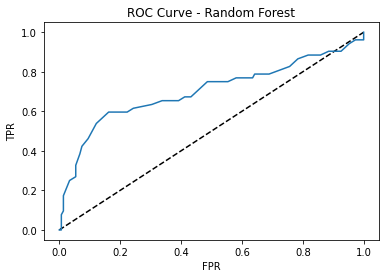

In [82]:
## Plotting ROC Curve
plt.plot([0,1],[0,1],'k--',label='50% AUC')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - Random Forest')
plt.show()

In [83]:
## ROC Score
roc_auc_score(y_test,y_pred_prob)

0.7015982328482329

### Hyper Parameter Tuning

In [84]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier_forest, X=X_train,y=y_train,cv=10)
print(accuracies.mean(), accuracies.std())

0.7424999999999999 0.016955824957813167


In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters = {'n_estimators':[25,50,200,300],
             'criterion':['gini','entropy'],
             'max_depth':[14,20,25,30]}

In [87]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

In [88]:
grid_search = grid_search.fit(X_train,y_train)
print('best_accuracy=',grid_search.best_score_)
print('best_parameters=',grid_search.best_params_)

best_accuracy= 0.7725
best_parameters= {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 25}


In [89]:
classification_forest = RandomForestClassifier(criterion = 'gini',
                                              max_depth = 25,
                                              n_estimators = 200,
                                              random_state = 0)
classifier_forest.fit(X_train,y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[121,  27],
       [ 18,  34]], dtype=int64)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       148
           1       0.56      0.65      0.60        52

    accuracy                           0.78       200
   macro avg       0.71      0.74      0.72       200
weighted avg       0.79      0.78      0.78       200



In [91]:
import pickle
filename = 'insurance_model.pkl'
pickle.dump(classifier_forest,open(filename,'wb'))

In [92]:
model = open('insurance_model.pkl','rb')
forest = pickle.load(model)

In [93]:
y_pred = forest.predict(X_test)

In [94]:
confusion_matrix(y_test, y_pred)

array([[121,  27],
       [ 18,  34]], dtype=int64)